# BN and DO
Task:

Train 4 neural networks with the functional API with the same number of neurons (at least 3 layers with at least 100 neurons each) for the digits dataset:
1. One model should have neither dropout or batch norm
2. One model should have batch norm
3. One model should have dropout
4. One model should have both Dropout and Batch Norm

Plot the results of the accuracy of the four different models on the same graph

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target

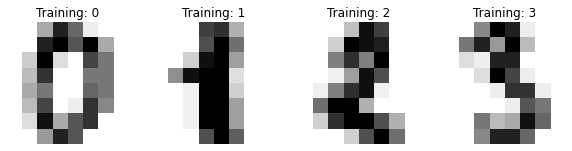

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [ ]:
X.shape

(1797, 64)

In [ ]:
y.shape

(1797,)

In [ ]:
X.dtype

dtype('float64')

In [ ]:
y.dtype

dtype('int64')

In [ ]:
X.shape

(1797, 64)

In [ ]:
y.shape

(1797,)

In [ ]:
X.shape[1]

64

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Functional API - Neither BN nor DO

In [ ]:
input_ = keras.layers.Input(shape = X.shape[1:])
flatten = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(100, activation="relu")(flatten)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(100, activation = 'relu')(hidden2)
concat = keras.layers.concatenate([flatten, hidden3])
output = keras.layers.Dense(10, activation = 'softmax')(concat)

model_1 = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 flatten (Flatten)              (None, 64)           0           ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 100)          6500        ['flatten[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 100)          10100       ['dense[0][0]']                  
                                                                                              

In [ ]:
model_1.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
                  metrics=["accuracy"])

In [ ]:
history_1 = model_1.fit(X, y, epochs=20)

Epoch 1/20
57/57 [==============================] - 2s 4ms/step - loss: 1.8316 - accuracy: 0.6656
Epoch 2/20
57/57 [==============================] - 0s 4ms/step - loss: 0.2794 - accuracy: 0.9093
Epoch 3/20
57/57 [==============================] - 0s 5ms/step - loss: 0.2077 - accuracy: 0.9427
Epoch 4/20
57/57 [==============================] - 0s 4ms/step - loss: 0.1329 - accuracy: 0.9638
Epoch 5/20
57/57 [==============================] - 0s 4ms/step - loss: 0.1269 - accuracy: 0.9572
Epoch 6/20
57/57 [==============================] - 0s 7ms/step - loss: 0.0969 - accuracy: 0.9694
Epoch 7/20
57/57 [==============================] - 0s 7ms/step - loss: 0.0824 - accuracy: 0.9750
Epoch 8/20
57/57 [==============================] - 0s 5ms/step - loss: 0.0657 - accuracy: 0.9811
Epoch 9/20
57/57 [==============================] - 0s 6ms/step - loss: 0.0559 - accuracy: 0.9816
Epoch 10/20
57/57 [==============================] - 0s 6ms/step - loss: 0.0527 - accuracy: 0.9850
Epoch 11/20
57/57 [

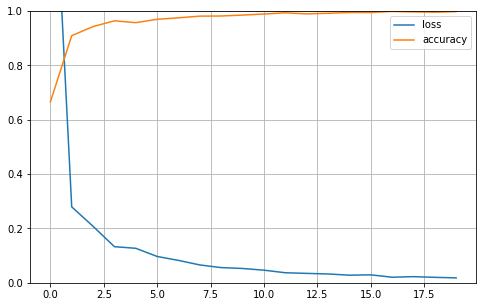

In [ ]:
import pandas as pd

pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
neither = pd.DataFrame(history_1.history)

In [ ]:
neither

,loss,accuracy
0,1.831595,0.665554
1,0.279369,0.909293
2,0.207713,0.942682
3,0.132875,0.963829
4,0.126943,0.957151
5,0.096868,0.969393
6,0.082389,0.974958
7,0.065686,0.981080
8,0.055915,0.981636
9,0.052650,0.984975


# Batch Normalization

In [ ]:
input_ = keras.layers.Input(shape = X.shape[1:])
flatten = keras.layers.Flatten()(input_)
bn1 = keras.layers.BatchNormalization()(flatten)
hidden1 = keras.layers.Dense(100, activation="relu")(bn1)
bn2 = keras.layers.BatchNormalization()(hidden1)
hidden2 = keras.layers.Dense(100, activation="relu")(bn2)
bn3 = keras.layers.BatchNormalization()(hidden2)
hidden3 = keras.layers.Dense(100, activation = 'relu')(bn3)
bn4 = keras.layers.BatchNormalization()(hidden3)
concat = keras.layers.concatenate([flatten, bn4])
output = keras.layers.Dense(10, activation = 'softmax')(concat)

model_2 = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 flatten_1 (Flatten)            (None, 64)           0           ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64)          256         ['flatten_1[0][0]']              
 alization)                                                                                       
                                                                                                  
 dense_4 (Dense)                (None, 100)          6500        ['batch_normalization[0][0]

In [ ]:
model_2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
                  metrics=["accuracy"])

In [ ]:
history_2 = model_2.fit(X, y, epochs=20)

Epoch 1/20
57/57 [==============================] - 2s 4ms/step - loss: 1.8964 - accuracy: 0.6472
Epoch 2/20
57/57 [==============================] - 0s 4ms/step - loss: 0.3107 - accuracy: 0.9004
Epoch 3/20
57/57 [==============================] - 0s 4ms/step - loss: 0.1869 - accuracy: 0.9388
Epoch 4/20
57/57 [==============================] - 0s 4ms/step - loss: 0.1354 - accuracy: 0.9572
Epoch 5/20
57/57 [==============================] - 0s 4ms/step - loss: 0.1102 - accuracy: 0.9666
Epoch 6/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0990 - accuracy: 0.9727
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0831 - accuracy: 0.9783
Epoch 8/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0646 - accuracy: 0.9822
Epoch 9/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9850
Epoch 10/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9866
Epoch 11/20
57/57 [

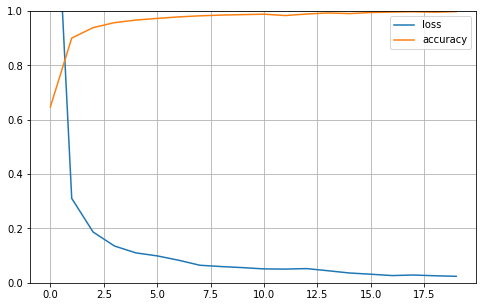

In [ ]:
import pandas as pd

pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
batchnorm = pd.DataFrame(history_2.history)

In [ ]:
batchnorm

,loss,accuracy
0,1.896396,0.647190
1,0.310661,0.900390
2,0.186931,0.938787
3,0.135378,0.957151
4,0.110152,0.966611
5,0.099036,0.972732
6,0.083106,0.978297
7,0.064594,0.982193
8,0.059734,0.984975
9,0.055876,0.986644


# Dropout

In [ ]:
input_ = keras.layers.Input(shape = X.shape[1:])
flatten = keras.layers.Flatten()(input_)
dp1 = keras.layers.Dropout(rate = 0.2)(flatten)
hidden1 = keras.layers.Dense(100, activation="relu")(dp1)
dp2 = keras.layers.Dropout(rate = 0.2)(hidden1)
hidden2 = keras.layers.Dense(100, activation="relu")(dp2)
dp3 = keras.layers.Dropout(rate = 0.2)(hidden2)
hidden3 = keras.layers.Dense(100, activation = 'relu')(dp3)
concat = keras.layers.concatenate([flatten, hidden3])
output = keras.layers.Dense(10, activation = 'softmax')(concat)

model_3 = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 flatten_2 (Flatten)            (None, 64)           0           ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 64)           0           ['flatten_2[0][0]']              
                                                                                                  
 dense_8 (Dense)                (None, 100)          6500        ['dropout[0][0]']                
                                                                                            

In [ ]:
model_3.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
                  metrics=["accuracy"])

In [ ]:
history_3 = model_3.fit(X, y, epochs = 20)

Epoch 1/20
57/57 [==============================] - 1s 2ms/step - loss: 2.3653 - accuracy: 0.6027
Epoch 2/20
57/57 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8620
Epoch 3/20
57/57 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.9110
Epoch 4/20
57/57 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.9171
Epoch 5/20
57/57 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9371
Epoch 6/20
57/57 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9388
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1557 - accuracy: 0.9505
Epoch 8/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.9622
Epoch 9/20
57/57 [==============================] - 0s 4ms/step - loss: 0.1171 - accuracy: 0.9627
Epoch 10/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.9583
Epoch 11/20
57/57 [

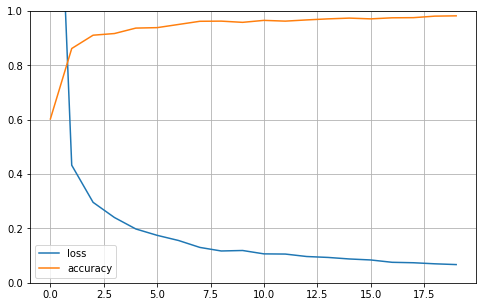

In [ ]:
import pandas as pd

pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
drop = pd.DataFrame(history_3.history)

In [ ]:
drop

,loss,accuracy
0,2.365349,0.602671
1,0.432640,0.861992
2,0.296060,0.910963
3,0.240179,0.917084
4,0.198099,0.937117
5,0.174621,0.938787
6,0.155672,0.950473
7,0.130157,0.962159
8,0.117062,0.962716
9,0.118852,0.958264


# BN and DO

In [ ]:
input_ = keras.layers.Input(shape = X.shape[1:])
flatten = keras.layers.Flatten()(input_)
dp1 = keras.layers.Dropout(rate = 0.2)(flatten)
hidden1 = keras.layers.Dense(100, activation="relu")(dp1)
bn1 = keras.layers.BatchNormalization()(hidden1)
dp2 = keras.layers.Dropout(rate = 0.2)(bn1)
hidden2 = keras.layers.Dense(100, activation="relu")(dp2)
bn2 = keras.layers.BatchNormalization()(hidden2)
dp3 = keras.layers.Dropout(rate = 0.2)(bn2)
hidden3 = keras.layers.Dense(100, activation = 'relu')(dp3)
bn3 = keras.layers.BatchNormalization()(hidden3)
concat = keras.layers.concatenate([flatten, bn3])
output = keras.layers.Dense(10, activation = 'softmax')(concat)

model_4 = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model_4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 flatten_3 (Flatten)            (None, 64)           0           ['input_4[0][0]']                
                                                                                                  
 dropout_3 (Dropout)            (None, 64)           0           ['flatten_3[0][0]']              
                                                                                                  
 dense_12 (Dense)               (None, 100)          6500        ['dropout_3[0][0]']              
                                                                                            

In [ ]:
model_4.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
                  metrics=["accuracy"])

In [ ]:
history_4 = model_4.fit(X, y, epochs = 20)

Epoch 1/20
57/57 [==============================] - 1s 3ms/step - loss: 1.7512 - accuracy: 0.6205
Epoch 2/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4447 - accuracy: 0.8715
Epoch 3/20
57/57 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.9015
Epoch 4/20
57/57 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.9310
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1970 - accuracy: 0.9388
Epoch 6/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1861 - accuracy: 0.9410
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1590 - accuracy: 0.9538
Epoch 8/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1482 - accuracy: 0.9521
Epoch 9/20
57/57 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.9583
Epoch 10/20
57/57 [==============================] - 0s 4ms/step - loss: 0.1289 - accuracy: 0.9633
Epoch 11/20
57/57 [

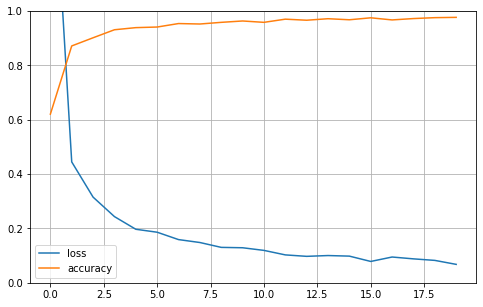

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
both = pd.DataFrame(history_4.history)

In [ ]:
both

,loss,accuracy
0,1.751228,0.620479
1,0.444745,0.871452
2,0.315223,0.901502
3,0.243579,0.930996
4,0.196971,0.938787
5,0.186097,0.941013
6,0.158964,0.953812
7,0.148229,0.952142
8,0.130335,0.958264
9,0.128939,0.963272


# Plot

In [ ]:
neither = neither.rename(columns = {'accuracy': 'neither'})
neither

,loss,neither
0,1.831595,0.665554
1,0.279369,0.909293
2,0.207713,0.942682
3,0.132875,0.963829
4,0.126943,0.957151
5,0.096868,0.969393
6,0.082389,0.974958
7,0.065686,0.981080
8,0.055915,0.981636
9,0.052650,0.984975


In [ ]:
batchnorm = batchnorm.rename(columns = {'accuracy': 'batch_normalization'})
batchnorm

,loss,batch_normalization
0,1.896396,0.647190
1,0.310661,0.900390
2,0.186931,0.938787
3,0.135378,0.957151
4,0.110152,0.966611
5,0.099036,0.972732
6,0.083106,0.978297
7,0.064594,0.982193
8,0.059734,0.984975
9,0.055876,0.986644


In [ ]:
drop = drop.rename(columns = {'accuracy': 'dropout'})
drop

,loss,dropout
0,2.365349,0.602671
1,0.432640,0.861992
2,0.296060,0.910963
3,0.240179,0.917084
4,0.198099,0.937117
5,0.174621,0.938787
6,0.155672,0.950473
7,0.130157,0.962159
8,0.117062,0.962716
9,0.118852,0.958264


In [ ]:
both = both.rename(columns = {'accuracy': 'both'})
both

,loss,both
0,1.751228,0.620479
1,0.444745,0.871452
2,0.315223,0.901502
3,0.243579,0.930996
4,0.196971,0.938787
5,0.186097,0.941013
6,0.158964,0.953812
7,0.148229,0.952142
8,0.130335,0.958264
9,0.128939,0.963272


In [ ]:
concatenated = pd.concat([neither.neither, batchnorm.batch_normalization, drop.dropout, both.both], axis = 1)
concatenated

,neither,batch_normalization,dropout,both
0,0.665554,0.647190,0.602671,0.620479
1,0.909293,0.900390,0.861992,0.871452
2,0.942682,0.938787,0.910963,0.901502
3,0.963829,0.957151,0.917084,0.930996
4,0.957151,0.966611,0.937117,0.938787
5,0.969393,0.972732,0.938787,0.941013
6,0.974958,0.978297,0.950473,0.953812
7,0.981080,0.982193,0.962159,0.952142
8,0.981636,0.984975,0.962716,0.958264
9,0.984975,0.986644,0.958264,0.963272


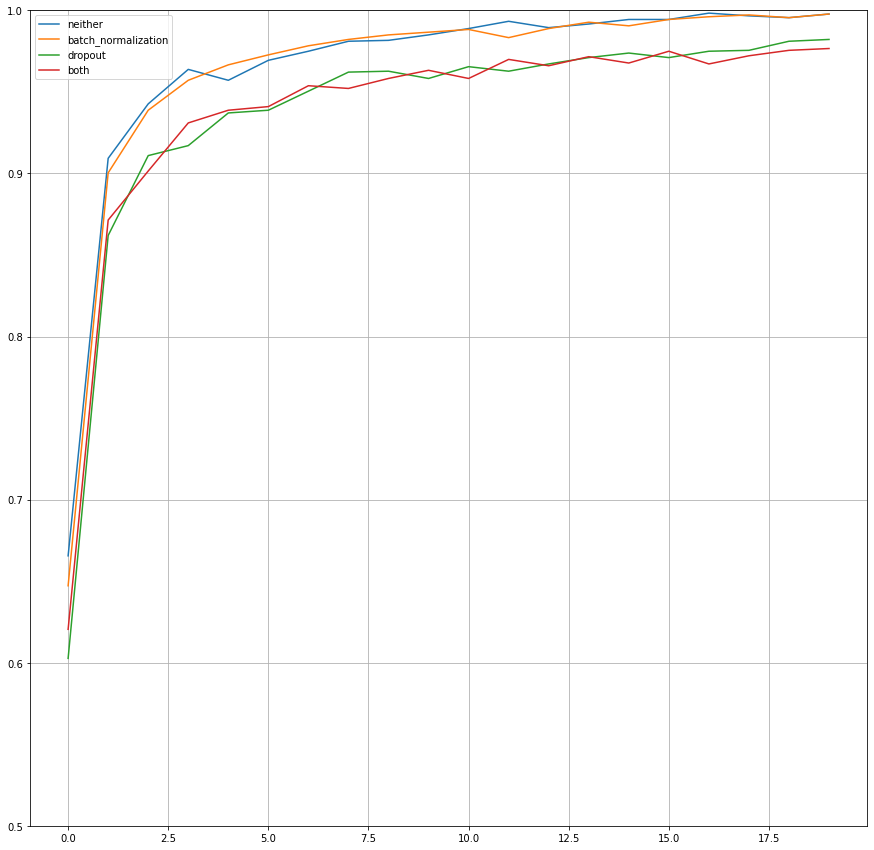

In [ ]:
concatenated.plot(figsize = (15,15))
plt.grid(True)
plt.gca().set_ylim(0.5,1)
plt.show()